<font size="+4">Lesson 5: Happiness and Pinecones</font>
    
In this lesson we'll compare top-down to bottom-up approaches to solving problems and show when and why a recursive, top-down approach might perform better.
    
To demonstrate this, we will use an example of the longest common subsequence problem, which I have called 'Happiness & Pinecones'.

Along the way you'll:
1. Practice the 4 steps you learned previously
2. Learn when to use the multi-prefix pattern of subproblems
    
    
The following video introduces the topic.  


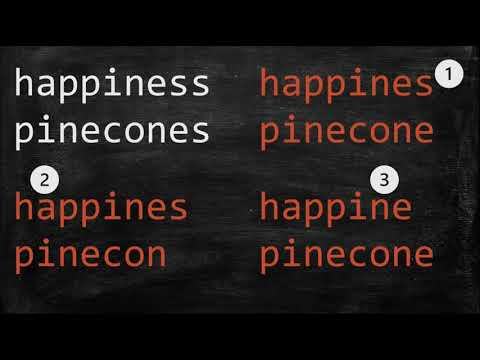

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('xe96r9RELyI')

In [4]:
%%HTML

<iframe width="560" height="315" src="https://musiclab.chromeexperiments.com/Song-Maker/embed/6213577384919040" frameborder="0" allowfullscreen></iframe>

# Longest Common Substring in Four Steps

<figure>
    <img src="../images/h_and_p_on_dna.png">
    <figcaption>Figure 1: You're given two strings. Find the length of the longest matching subsequences you can find in both words.
    </figcaption>
</figure>
<p>

Note: The longest common substring problem is most often stated like this: You are given two string, X of length n and Y of length m. Find the longest string which is a substring of both X and Y. The worked example in this notebook will be to find the _length_ of the longest substring and not the substring itself.

In [ ]:
%run quizzes/quiz.py quizzes/05/lcs_example.json

## Examine all Possible Solutions (step 1)
Remember that by the end of this step you will be have a way to examine all valid possibilities according to constraints or instructions in the given problem statement.

### Ignore Optimization
__Start this way:__  Read the problem and pick out the optimization request if any - and ignore it! Answer the following quiz about the problem described here and in Figure 1 above.

In [50]:
%run quizzes/quiz.py quizzes/05/lcs_first_step.json

VBox(box_style='info', children=(HBox(children=(HTML(value='<style>p{word-wrap: break-word}</style> <p>How wil…

### Choose the Subproblem Pattern
In previous problems we looked at a prefix of the given input. In this problem we will do something similar, but our input is two strings, so we'll look at _two_ prefixes.

If your input is: $x_1$, $x_2$, $x_3$, ... ,$x_n$, and $y_1$, $y_2$, $y_3$, ... ,$y_m$, your subproblems will be of the form: $x_1$, $x_2$, $x_3$, ..., $x_i$ and $y_1$, $y_2$, $y_3$, ... , $y_j$. For example:

    +---------------------------------+
    | x1   x2   x3  x4   x5   x6   x7 |  x8   x9   x10
    +---------------------------------+
    
    +------------------+
    | y1   y2   y3  x4 | x5   x6    x7   x8   x9   x10
    +------------------+

Now that we have the general form of the subproblems, we need to divide them into types. 

### Divide Subproblems into Cases
Remember that there are 3 main ways to derive the recurrence relation:

1. __It's given to you!__ That's not the case here
2. __Build it from a given constraint.__ This is our case: the strings must be substrings and they must match. If they don't match, we don't count them.
3. __Add your own constraint, then build from that.__ n/a

The constraint of 'substrings must be substrings and they must match in order to count them' doesn't lead as smoothly into the recurrence relation as in the drinking game/largest independent set in a tree problem. But it still hints how to start: Start by __comparing the last letter__ of each word.

Do they match? If they do, then we're interested in looking at the rest of both strings. If they don't match, then we need to split the next step into two: look at the whole of the 1st string and one letter less of the 2nd string. Then look at the whole of the 2nd string and one letter less of the 1st string.

The important thing to note is that what I wrote above is NOT the final algorithm - it's just a way to think about how to build a recurrence relation that knows how to _count_ substring lengths and covers all the possible substrings.

In [51]:
%run quizzes/quiz.py quizzes/05/lcs_rr.json

VBox(box_style='info', children=(HBox(children=(HTML(value='<style>p{word-wrap: break-word}</style> <p>Select …

Going back to our example of 'happiness and pinecones', you have the following three cases (first call of the function)

1. Compare last letters ('s' and 's') and add result to comparison of 'happines' and 'pinecone'
2. Compare 'happiness' and 'pinecone'
3. Compare 'happines' and 'pinecones'

## Write the Recursive Algorithm (step 2)
Once you write the recurrence relation, you're basically done, so let's dive in.

### Add Optimization Back In
The problem asked to find the _longest_ substring. So the recurrence relation will include _maximizing_ over the three cases you found above.

### Write the Recurrence Relation
The video goes into some detail describing the steps to figuring out the recurrence relation. I admit that I found it easier to first write the algorithm in Python, but writing up the recurrence was a good exercise in LaTeX 😜

<div class="exercise exercise-info">
Writing the recurrence relation is the crux to solving the problem. Try to work it out yourself.
</div>

$x_i \text{ are the first i letters of X}$

$y_j \text{ are the first j letters of Y}$


\begin{equation}
  lcs(x_m, y_n, count) = 
  \begin{cases}
    count,  & \text{if}\ i=0 \text{ or } j = 0 \\
    max
    \begin{cases} & & & & & & \text{otherwise} \\
      c
      \begin{cases}  \\
        lcs(x_{i-1}, y_{j-1}, count + 1),  & & & \text{if}\  x_i = y_j \\
        count, &  & & \text{otherwise}  \\
      \end{cases} \\
     lcs(x_i, y_{j-1}, 0)  \\
     lcs(x_{i-1}, y_{j}, 0)  \\
    \end{cases}
  \end{cases}
\end{equation}


### Implement the Recursive Algorithm
Keep the recurrence relation in front of you as a guide for the following exercise.

<div class="exercise exercise-info">
Implement the naive recursive algorithm to calculate the length of the longest common substring when given two strings X and Y. It will run in exponential time, that's expected for this step. Starter code provided below. Note that the function <code>lcs_count(X, Y)</code> takes zero based strings as input which is different from the recurrence formula which is 1-based.
</div>

In [ ]:
def lcs(X, Y, count):
    ### YOUR CODE ###
    return 0

def lcs_count(X,Y):
    return lcs(X, Y, 0)

# unit tests
# YOUR CASES HERE ###

#assert(lcs_count('happiness', 'pinecones') == 4)

## Write the Memoized Algorithm (step 3)
At this point you have a correct but inefficient algorithm. The naive recursive algorithm runs in exponential time. Remember that all memoization does is store the solutions of the subproblems so that they don't need to be calculated more than once.

<div class="exercise exercise-info">
Now implement the recursive, <b>memoized</b> algorithm to solve Happiness & Pinecones (longest common substring) problem. Starter code provided below. A clever solution from Schmatz, (2017) uses a decorator to memoize and caches results using the calling function's arguments as index into the cache (see solutions).
    
While you're working on this, note how a table of values is built
</div>

In [63]:
#This solution is from (Schmatz, 2017)
def memoize(original_function):
    memo = {}
    
    def wrapper(*args):
       ## YOUR CODE
        
    return wrapper

@memoize
def lcs(X, Y, count = 0):

    ## YOUR CODE
    return 0

def lcs_count(X,Y):
    return lcs(X, Y, 0)

#unit tests
assert(lcs('', '') == 0)
assert(lcs('cat', 'sa') == 1)

## Write the Iterative Algorithm (step 4)
In this exercise, you will build 

In [49]:
# Python3 implementation to print 
# the longest common substring 

# function to find and print 
# the longest common substring of 
# X[0..m-1] and Y[0..n-1] 
def printLCSSubStr(X: str, Y: str, 
				m: int, n: int): 

	# Create a table to store lengths of 
	# longest common suffixes of substrings. 
	# Note that LCSuff[i][j] contains length 
	# of longest common suffix of X[0..i-1] and 
	# Y[0..j-1]. The first row and first 
	# column entries have no logical meaning, 
	# they are used only for simplicity of program 
	LCSuff = [[0 for i in range(n + 1)] 
				for j in range(m + 1)] 

	# To store length of the 
	# longest common substring 
	length = 0

	# To store the index of the cell 
	# which contains the maximum value. 
	# This cell's index helps in building 
	# up the longest common substring 
	# from right to left. 
	row, col = 0, 0

	# Following steps build LCSuff[m+1][n+1] 
	# in bottom up fashion. 
	for i in range(m + 1): 
		for j in range(n + 1): 
			if i == 0 or j == 0: 
				LCSuff[i][j] = 0
			elif X[i - 1] == Y[j - 1]: 
				LCSuff[i][j] = LCSuff[i - 1][j - 1] + 1
				if length < LCSuff[i][j]: 
					length = LCSuff[i][j] 
					row = i 
					col = j 
			else: 
				LCSuff[i][j] = 0

	# if true, then no common substring exists 
	if length == 0: 
		print("No Common Substring") 
		return

	# allocate space for the longest 
	# common substring 
	resultStr = ['0'] * length 

	# traverse up diagonally form the 
	# (row, col) cell until LCSuff[row][col] != 0 
	while LCSuff[row][col] != 0: 
		length -= 1
		resultStr[length] = X[row - 1] # or Y[col-1] 

		# move diagonally up to previous cell 
		row -= 1
		col -= 1

	# required longest common substring 
	print(''.join(resultStr)) 

# Driver Code 
if __name__ == "__main__": 
	X = "OldSite:GeeksforGeeks.org"
	Y = "NewSite:GeeksQuiz.com"
	m = len(X) 
	n = len(Y) 

	printLCSSubStr(X, Y, m, n) 

# This code is contributed by 
# sanjeev2552 


printLCSSubStr('abcdefgh', 'acdefh', 8, 6)

Site:Geeks
cdef


In [ ]:
def iterate(f):
    ## YOUR CODE ##
    return 0

@iterate
def solve(v):
    ### YOUR CODE ###
    return 0

#unit tests (hint: there are 3 base cases!)
## YOUR CASES HERE ###

#assert(solve([3, 1, 4, 1, 5, 9, 2, 6]) == 22)

<div class="exercise exercise-info">
Try running your recursive memoized fibonacci algorithm with a large number and see what happens. Remove the comment in front of the magic %load command and run the cell. The solution code will be loaded into the cell and you can then experiment.
</div>

In [ ]:
# a random tree with 16 nodes
edges = [(0, 1),(0, 2,), (0, 3),
        (1,4), (1,5),
        (2,6), (2,7),
        (3,8),
        (4,9), (4,10), (4,11),
        (5,12), (5,13),
        (7,14), (7,15), (7,16), (7,17),
        (8,18), (8,19)]
tree = Graph(edges=edges)

layout = tree.layout_reingold_tilford_circular(100, 0, 2)

tree.vs['label'] = [v.index for v in tree.vs]

visual_style["vertex_size"] = [20]
visual_style["vertex_label"] = [v.index for v in tree.vs]
visual_style["layout"] = layout
visual_style["bbox"] = (400, 400)
visual_style["margin"] = [50, 50, 50, 50]
plot(tree, **visual_style)

In [ ]:
def memoize(f):
    ### YOUR CODE ###
    def helper(v):
        return helper

@memoize
def solve_lis(g):
    ## YOUR CODE ##
    return 0

#unit tests - base cases (theoretically there is just the empty tree as base case but it can simplify the code to have 3 base cases: 0, 1 & 2 nodes.)
## YOUR CASES HERE ###
# SOME EXAMPLE CASES
# g1 = Graph(edges=[(0, 1),(0, 2)])
# g2 = Graph(edges=[(0, 1),(0, 2), (0,3)])
# g3 = Graph(edges=[(0, 1),(0, 2), (2,3)])
# assert(solve_lis(g1) == 2)
# assert(solve_lis(g2) == 3)
# assert(solve_lis(g3) == 2)

# Solutions

<div class="exercise exercise-warning"><details><summary>Longest common substring - naive - recursive</summary> 
    
```python 
    
    #%load solutions/05/lcs_naive.py
    def lcs(X, Y, count = 0):

    m, n = len(X), len(Y)
    if m == 0 or n == 0:
        return count 

    if X[m - 1] == Y[n - 1]:
        count = lcs(X[0: m - 1], Y[0: n - 1], count + 1)

    return max(count, lcs(X[0:m], Y[0:n-1], 0), lcs(X[0:m-1], Y[0:n], 0))

    def lcs_count(X,Y):
        return lcs(X, Y, 0)

    #unit tests
    assert(lcs('', '') == 0)
    assert(lcs('', 'b') == 0)
    assert(lcs('a', 'ab') == 1)
   
```
    
</details>

<div class="exercise exercise-warning"><details><summary>Longest common substring - memoized</summary> 
    
```python 
    
    # This clever memoization is from:
    # Schmatz, S. (2017, December 7). Intermediate Dynamic Programming. https://stevenschmatz.github.io/blog/2017/12/07/intermediate-dynamic-programming/
    def memoize(original_function):
        memo = {}

        def wrapper(*args):
            t_args = tuple(args)
            if t_args in memo:
                return memo[t_args]

            result = original_function(*args)
            memo[t_args] = result

            return result

        return wrapper


    @memoize
    def lcs(X, Y, count = 0):

        m, n = len(X), len(Y)
        print ('in lcs', m, " : ", X, "   ", n, " : ", Y , " -->", count)
        if m == 0 or n == 0:
            return count 

        if X[m - 1] == Y[n - 1]:
            count = lcs(X[0: m - 1], Y[0: n - 1], count + 1)

        return max(count, lcs(X[0:m], Y[0:n-1], 0), lcs(X[0:m-1], Y[0:n], 0))

    def lcs_count(X,Y):
        return lcs(X, Y, 0)

    #unit tests
    lcs('abc', 'abc', 0)
   
```
    
</details>

<div class="exercise exercise-warning"><details><summary>Longest common substring - bottom up</summary> 
    
```python
    
```
    
</details>

# Footnotes

<span id="fn1"></span>

    1. 

<span id="fn2"></span>



# References

1. Dasgupta, S., Papadimitriou, C. H., & Vazirani, U. V. (2008). Algorithms. McGraw-Hill Higher Education New York.

2. Forišek, M. (2015). Towards a better way to teach dynamic programming. Olympiads in Informatics, 9, 45–55.

3. Jauhari, A. (2017, August 20). Print the longest common substring. GeeksforGeeks. https://www.geeksforgeeks.org/print-longest-common-substring/

4. Schmatz, S. (2017, December 7). Intermediate Dynamic Programming. https://stevenschmatz.github.io/blog/2017/12/07/intermediate-dynamic-programming/

In [23]:
#workaround for known ipywidget issue not rendering alert style colours on Jupyter lab
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())

In [54]:
def memoize(original_function):
    memo = {}
    
    def wrapper(*args):
        t_args = tuple(args)
        if t_args in memo:
            return memo[t_args]
            
        result = original_function(*args)
        memo[t_args] = result
        print ('\n', memo)
        return result
        
    return wrapper


@memoize
def lcs(X, Y, count = 0):

    m, n = len(X), len(Y)
    #print ('in lcs', m, " : ", X, "   ", n, " : ", Y , " -->", count)
    if m == 0 or n == 0:
        return count 

    if X[m - 1] == Y[n - 1]:
        count = lcs(X[0: m - 1], Y[0: n - 1], count + 1)

    return max(count, lcs(X[0:m], Y[0:n-1], 0), lcs(X[0:m-1], Y[0:n], 0))

def lcs_count(X,Y):
    return lcs(X, Y, 0)

#unit tests
lcs('abc', 'abc', 0)


 {('', '', 3): 3}

 {('', '', 3): 3, ('a', '', 0): 0}

 {('', '', 3): 3, ('a', '', 0): 0, ('', 'a', 0): 0}

 {('', '', 3): 3, ('a', '', 0): 0, ('', 'a', 0): 0, ('a', 'a', 2): 3}

 {('', '', 3): 3, ('a', '', 0): 0, ('', 'a', 0): 0, ('a', 'a', 2): 3, ('ab', '', 0): 0}

 {('', '', 3): 3, ('a', '', 0): 0, ('', 'a', 0): 0, ('a', 'a', 2): 3, ('ab', '', 0): 0, ('', '', 1): 1}

 {('', '', 3): 3, ('a', '', 0): 0, ('', 'a', 0): 0, ('a', 'a', 2): 3, ('ab', '', 0): 0, ('', '', 1): 1, ('a', 'a', 0): 1}

 {('', '', 3): 3, ('a', '', 0): 0, ('', 'a', 0): 0, ('a', 'a', 2): 3, ('ab', '', 0): 0, ('', '', 1): 1, ('a', 'a', 0): 1, ('ab', 'a', 0): 1}

 {('', '', 3): 3, ('a', '', 0): 0, ('', 'a', 0): 0, ('a', 'a', 2): 3, ('ab', '', 0): 0, ('', '', 1): 1, ('a', 'a', 0): 1, ('ab', 'a', 0): 1, ('', 'ab', 0): 0}

 {('', '', 3): 3, ('a', '', 0): 0, ('', 'a', 0): 0, ('a', 'a', 2): 3, ('ab', '', 0): 0, ('', '', 1): 1, ('a', 'a', 0): 1, ('ab', 'a', 0): 1, ('', 'ab', 0): 0, ('a', 'ab', 0): 1}

 {('', '', 3): 3, ('a'

3

In [61]:
# %load solutions/05/lcs_iterate.py
def iterate(f):
    memo = {}

    def helper(X, Y, count):
        
        m,n = len(X), len(Y)
        
        if m not in memo:
            memo[m] = dict()
        
        for i in range(0, m):
            if n not in memo[i]:
                for j in range(0, n):
                    memo[i][j] = f(X, Y, count)
                    #print(memo)
        
        return memo[m][n]

    return helper



def lcs(X, Y, count = 0):

    m, n = len(X), len(Y)
    # print (m, " : ", X, "   ", n, " : ", Y , " -->", count)
    if m == 0 or n == 0:
        print('returning count (', m, n, ')  count=', count)
        return count 

    if X[m - 1] == Y[n - 1]:
        count = lcs(X[0: m - 1], Y[0: n - 1], count + 1)

    return max(count, lcs(X[0:m], Y[0:n-1], 0), lcs(X[0:m-1], Y[0:n], 0))

def lcs_count(X,Y):
    return lcs(X, Y, 0)

#unit tests
lcs_count('ab', 'abc')

returning count ( 0 0 )  count= 2
returning count ( 1 0 )  count= 0
returning count ( 0 1 )  count= 0
returning count ( 2 0 )  count= 0
returning count ( 0 0 )  count= 1
returning count ( 1 0 )  count= 0
returning count ( 0 1 )  count= 0
returning count ( 0 0 )  count= 1
returning count ( 1 0 )  count= 0
returning count ( 0 1 )  count= 0
returning count ( 0 2 )  count= 0
returning count ( 0 0 )  count= 1
returning count ( 1 0 )  count= 0
returning count ( 0 1 )  count= 0
returning count ( 0 2 )  count= 0
returning count ( 0 3 )  count= 0


2